<a href="https://colab.research.google.com/github/erinmcmahon26/Company-Bankruptcy-Prediction-Kaggle/blob/main/Company_Bankruptcy_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report 
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVR
from sklearn.linear_model import SGDClassifier
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [38]:
df = pd.read_csv('https://raw.githubusercontent.com/erinmcmahon26/Company-Bankruptcy-Prediction-Kaggle/main/company_bankruptcy.csv')

In [39]:
bankrupt_sample = df[df['Bankrupt?'] == 0][0:220]
non_bankrupt_sample = df[df['Bankrupt?'] == 1]
df2 = pd.concat([bankrupt_sample,non_bankrupt_sample],axis = 0)
df2.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
6,0,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,0.781180,3.984834e-04,7.300000e+08,0.461020,0.000805,0.000000,0.158822,0.158822,0.158822,0.161482,0.316687,0.030915,0.099910,0.128945,0.022112,0.848322,0.688590,0.688590,0.217604,5.720000e+09,0.000352,0.263032,0.375303,0.004672,0.002869,0.629988,0.024441,0.216102,0.783898,0.005005,...,0.295221,0.022989,0.003974,0.001050,0.115920,0.340081,0.276643,0.002159,0.508089,0.728731,0.337392,0.009347,0.911441,0.002121,0.092802,1.058011e-04,9.560000e+09,0.593893,2.390000e+09,0.671562,0.355854,0.508089,0.337392,0.120561,0.630419,0.457785,0.560653,0.310296,0.060765,0,0.736619,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,1,0.015663
7,0,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,0.781621,9.000000e+09,5.090000e+07,0.467024,0.000630,0.157607,0.176984,0.176984,0.176984,0.225206,0.324114,0.042561,0.104796,0.180462,0.022114,0.848082,0.689535,0.689535,0.217633,6.630000e+09,0.000451,0.264112,0.384235,0.009657,0.007305,0.631379,0.005278,0.108202,0.891798,0.005640,...,0.447942,0.014616,0.007565,0.000888,0.087042,0.353511,0.277275,0.005756,0.755770,0.734946,0.329804,0.005346,0.935449,0.002360,0.025482,7.290000e+09,6.180000e+09,0.593937,7.340000e+08,0.671572,0.218473,0.755770,0.329804,0.114508,0.641553,0.458954,0.610091,0.314364,0.030201,0,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,1,0.034889
8,0,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,0.781598,1.687136e-04,0.000000e+00,0.463142,0.000737,0.005871,0.184189,0.184189,0.184189,0.218398,0.318773,0.026604,0.095188,0.173157,0.022128,0.848159,0.689924,0.689924,0.217654,6.890000e+09,0.000453,0.264151,0.377994,0.013499,0.011823,0.630915,0.002266,0.

In [40]:
y = df['Bankrupt?']
x = df.drop('Bankrupt?', axis=1)

In [41]:
y2 = df2['Bankrupt?']
x2 = df2.drop('Bankrupt?', axis=1)

In [42]:
#create absolute value correlation matrix, since we don't care about direction and it will make the following steps easier
cor_matrix = x.corr().abs()

In [43]:
cor_matrix2 = x2.corr().abs()

In [44]:
#pull only the upper triangle since correlation matrices and symmetric
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
#identify colinear features at threshold .9
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
xfinal = x.drop(to_drop, axis=1)

In [45]:
upper_tri = cor_matrix2.where(np.triu(np.ones(cor_matrix2.shape),k=1).astype(np.bool))
#identify colinear features at threshold .9
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
x2final = x.drop(to_drop, axis=1)

In [46]:
len(to_drop)

27

In [50]:
scaler = StandardScaler()
xfinal = scaler.fit_transform(x.astype(np.float64))

In [51]:
scaler = StandardScaler()
x2final = scaler.fit_transform(x.astype(np.float64))

In [52]:
x_train, x_test, y_train, y_test = train_test_split(xfinal,y, test_size=0.2, random_state=42)

In [55]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2final,y, test_size=0.2, random_state=42)

accuracy score =  0.9633431085043989
Classification Report               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       1.00      0.02      0.04        51

    accuracy                           0.96      1364
   macro avg       0.98      0.51      0.51      1364
weighted avg       0.96      0.96      0.95      1364



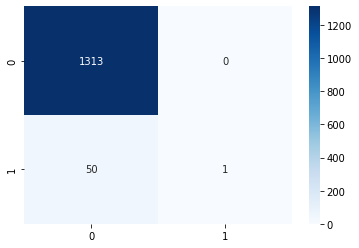

In [54]:
svc = SVC()
svc.fit(x_train, y_train)

sy_pred = svc.predict(x_test)
cm = confusion_matrix(y_test, sy_pred)

sva = accuracy_score(y_test, sy_pred)
print('accuracy score = ',accuracy_score(y_test, sy_pred))
print("Classification Report",classification_report(y_test, sy_pred))

sns.heatmap(cm,annot=True,fmt="d",cmap = "Blues")

accuracy score =  0.9633431085043989
Classification Report               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       1.00      0.02      0.04        51

    accuracy                           0.96      1364
   macro avg       0.98      0.51      0.51      1364
weighted avg       0.96      0.96      0.95      1364



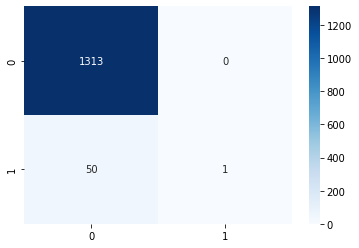

In [56]:
svc = SVC()
svc.fit(x2_train, y2_train)

sy2_pred = svc.predict(x2_test)
cm = confusion_matrix(y2_test, sy2_pred)

sva = accuracy_score(y2_test, sy2_pred)
print('accuracy score = ',accuracy_score(y2_test, sy2_pred))
print("Classification Report",classification_report(y2_test, sy2_pred))

sns.heatmap(cm,annot=True,fmt="d",cmap = "Blues")